In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Noc 29 010:51:37 2018

@author: Rene
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.animation as anim
from IPython.display import HTML

In [31]:
def FFT(aperture):
    f = plt.figure(figsize=(20,60))
    ax1 = f.add_subplot(131)
    ax1.imshow(aperture, cmap = 'gray')
    plt.title('Aperture')

    ft_aperture = fft2(aperture)
    FT_aperture = fftshift(np.abs(ft_aperture))
    ax2 = f.add_subplot(132)
    ax2.imshow(FT_aperture, cmap = 'gray')
    plt.title('Fourier Transform')

    ax3 = f.add_subplot(133)
    ax3.imshow(np.log(FT_aperture), cmap = 'gray')
    plt.title('FT in LOG scale')
    
    #f.colorbar(p)


In [32]:
def Circ(r, transparency): #circle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = circle(*center, r)
    aperture[x, y] = transparency
    
    return aperture

def Cake(r1,r2, t1, t2): #circle
    L = 256
    aperture = Circ(r2,t2)
    center = (L/2,L/2)
    x, y = circle(*center, r1)
    aperture[x, y] = t1
    
    return aperture

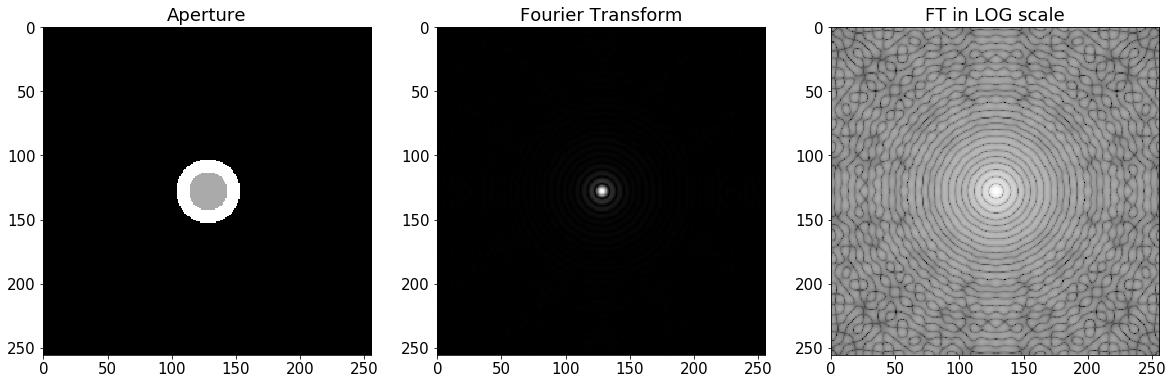

In [33]:




plt.rcParams.update({'font.size': 15})
Wedding = Cake(15,25,0.4,0.6)
FFT(Wedding)

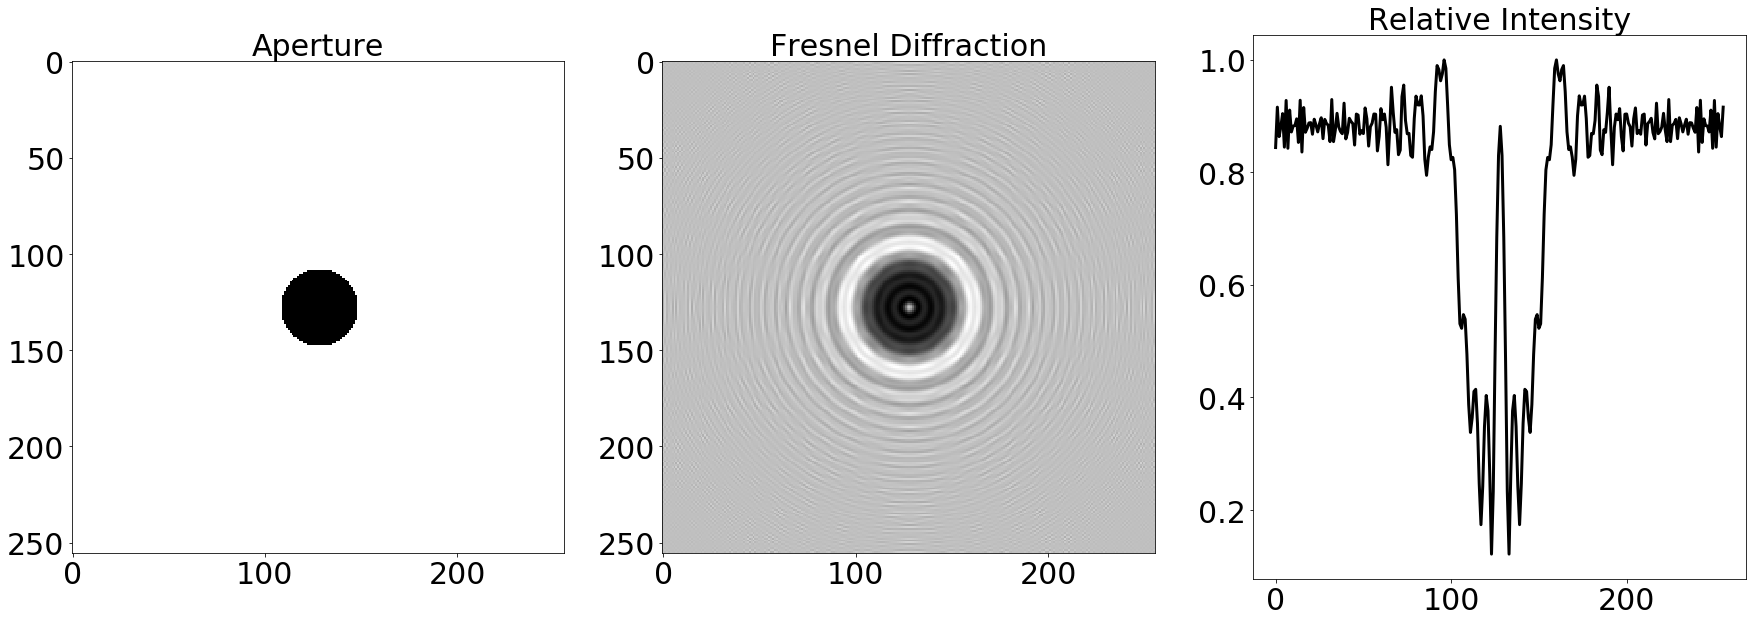

In [111]:
def Fresnel_Diffraction(r):
    f = plt.figure(figsize=[30,10])
    f.tight_layout()
    plt.rcParams['axes.titlesize'] = 30
    plt.rcParams.update({'font.size': 30})
    

    L = 256
    aperture = np.ones(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = circle(*center, r)
    aperture[x, y] = 0
    
    plt.subplot(131)
    plt.imshow(aperture, cmap = 'gray') 
    plt.title('Aperture')
    
    a = b = np.arange(0,256,1)
    X, Y = np.meshgrid(a,b)
    M = aperture*np.exp(1j*((X**2 + Y**2)*(np.pi/256)))
    I = np.abs((fft2(M)))
    
    plt.subplot(132)
    plt.imshow(I**2, cmap = 'gray')
    plt.title('Fresnel Diffraction')
    
    profile = I[128,:]
    
    plt.subplot(133)
    plt.plot(a, profile/max(profile), 'k-', lw = 3)
    plt.title('Relative Intensity')
    plt.show()
    
Fresnel_Diffraction(20)